# Dimensioning of the corona rings
## Maximum electric field

- corona_bottom.z: Bottom corona relative z position. 0 is centerline of top of clamp at bottom

- corona_bottom.r: Radius of the bottom corona ring (of the donut)

- corona_bottom.D: Bottom corona ring diameter (XS of the ring outer diameter)

- filename /Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/03.new_chamber/03.E_field/03.E_field.max_E_field.csv

<img src="03.E_field.002.png" style="width:50%">

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [4]:
fname = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/03.new_chamber/03.E_field/03.E_field.max_E_field.csv'

In [9]:
df = pd.read_csv(fname, skiprows=4)
df.columns = ['D', 'r_rev', 'z', 'E_max']  # Diameter of the tube that will form the corona ring, r_rev: radius of the revolved structure (donut)
df.head()

,D,r_rev,z,E_max
0,10.0,180.0,-25.000000,5.267247
1,10.0,180.0,-22.631579,5.186875
2,10.0,180.0,-20.263158,5.100787
3,10.0,180.0,-17.894737,5.023637
4,10.0,180.0,-15.526316,4.939620


How many parameters are there in the dataset?


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
D        500 non-null float64
r_rev    500 non-null float64
z        500 non-null float64
E_max    500 non-null float64
dtypes: float64(4)
memory usage: 15.7 KB


In [11]:
df.describe()

,D,r_rev,z,E_max
count,500.000000,500.000000,500.00000,500.000000
mean,55.000000,265.000000,-2.50000,4.042849
std,31.851673,60.164271,13.67066,1.099018
min,10.000000,180.000000,-25.00000,1.073234
25%,32.500000,222.500000,-13.75000,3.240892
50%,55.000000,265.000000,-2.50000,4.181824
75%,77.500000,307.500000,8.75000,4.882350
max,100.000000,350.000000,20.00000,5.890387


In [13]:
print(f'Number of corona_bottom.z values: {len(df.z.unique())}')
print(f'Number of corona_bottom.r values: {len(df.r_rev.unique())}')
print(f'Number of corona_bottom.D values: {len(df.D.unique())}')

Number of corona_bottom.z values: 20
Number of corona_bottom.r values: 5
Number of corona_bottom.D values: 5


## Plot E_max vs z for different r values

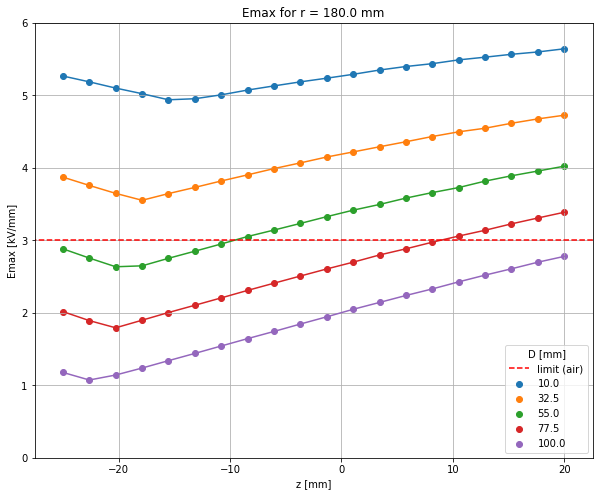

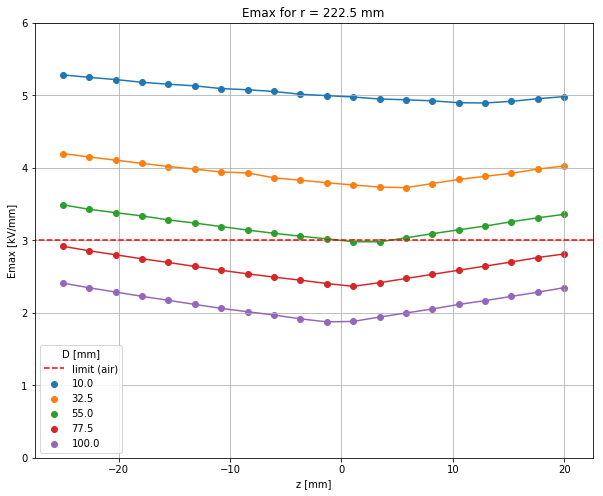

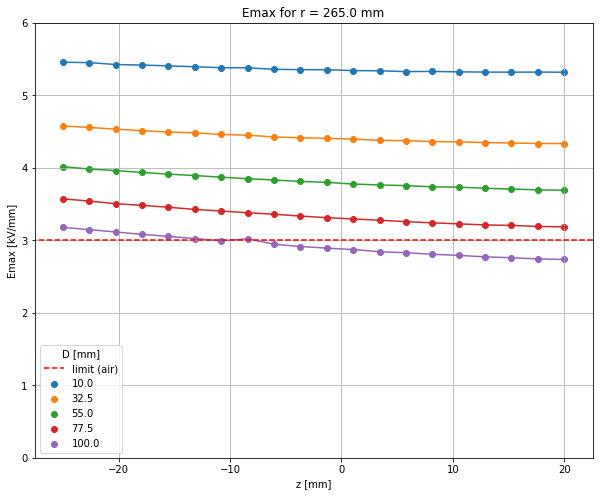

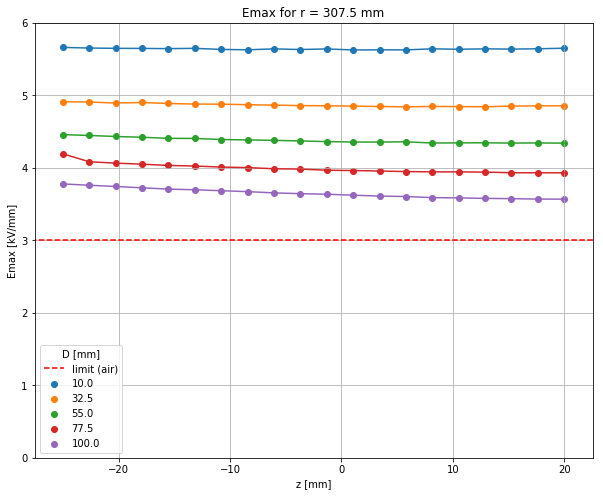

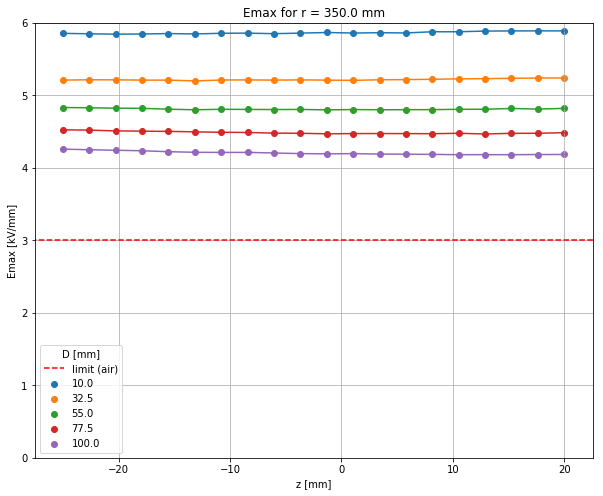

In [25]:
r_values = df['r_rev'].unique()
D_values = df['D'].unique()

for r in r_values:
    plt.figure(figsize=(10, 8))
    this_df = df[ df['r_rev'] == r ]
    for D in D_values:
        this_df_each = this_df[ this_df['D'] == D ]
        plt.plot(this_df_each['z'].values, this_df_each['E_max'].values)
        plt.scatter(this_df_each['z'].values, this_df_each['E_max'].values, label=f'{D}')
    
    plt.ylim(0, 6)
    xlim = plt.gca().get_xlim()
    plt.xlim(xlim)
    plt.plot([-50, 50], [3, 3], color='red', linestyle='--', label='limit (air)')
    plt.title(f'Emax for r = {r:.1f} mm')
    plt.legend(title='D [mm]')
    plt.grid()
    plt.xlabel('z [mm]')
    plt.ylabel('Emax [kV/mm]')
    plt.show()

## Plot E_max vs z for different D values

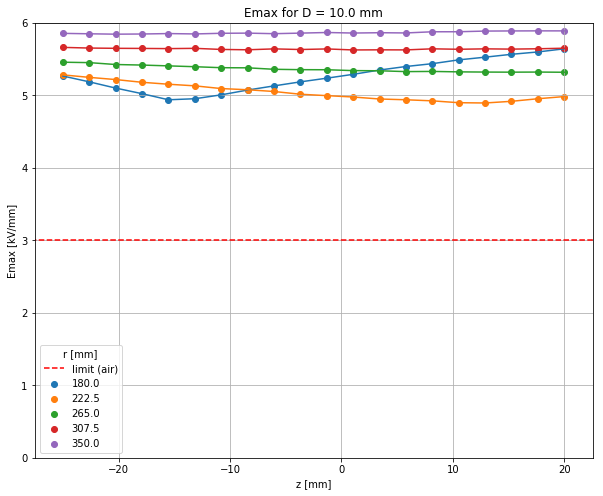

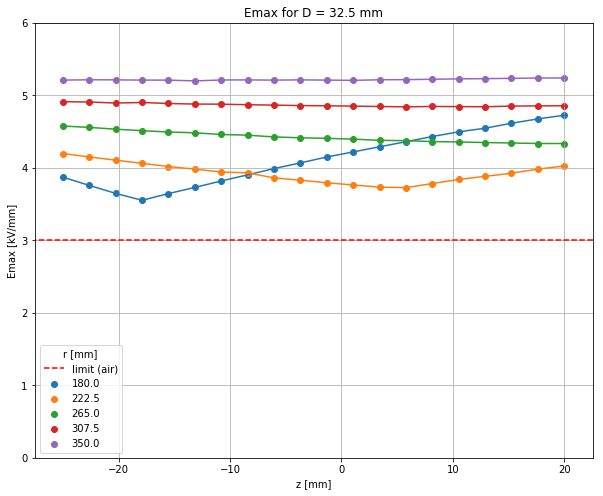

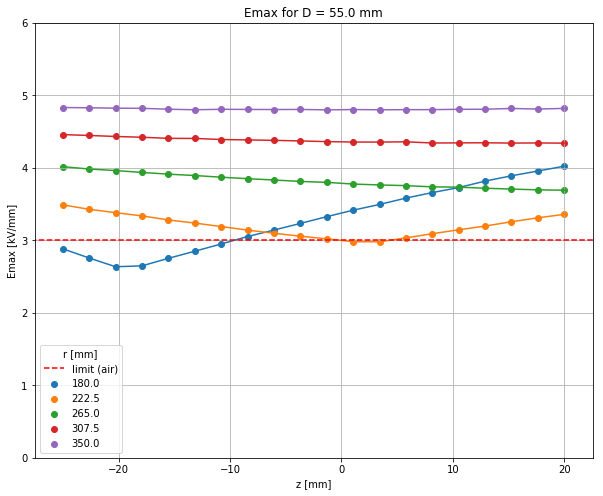

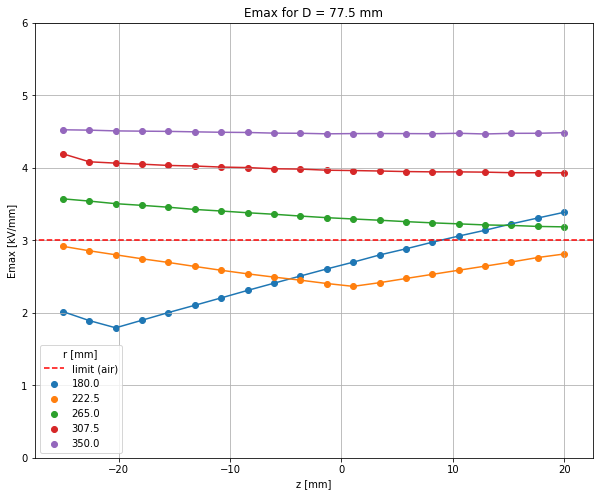

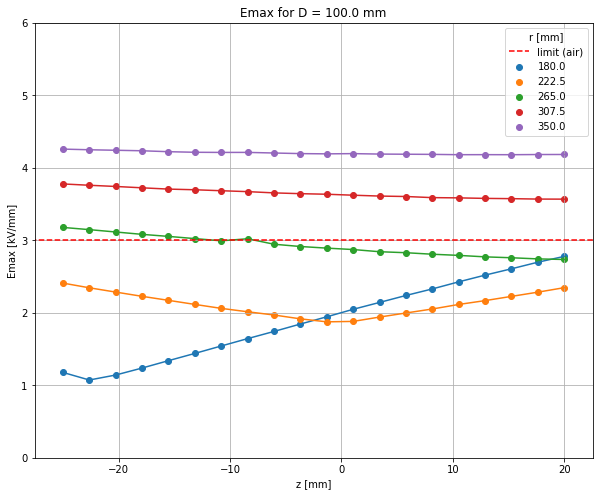

In [28]:
r_values = df['r_rev'].unique()
D_values = df['D'].unique()

for D in D_values:
    plt.figure(figsize=(10, 8))
    this_df = df[ df['D'] == D ]
    for r in r_values:
        this_df_each = this_df[ this_df['r_rev'] == r ]
        plt.plot(this_df_each['z'].values, this_df_each['E_max'].values)
        plt.scatter(this_df_each['z'].values, this_df_each['E_max'].values, label=f'{r:.1f}')
    
    plt.ylim(0, 6)
    xlim = plt.gca().get_xlim()
    plt.xlim(xlim)
    plt.plot([-50, 50], [3, 3], color='red', linestyle='--', label='limit (air)')
    plt.title(f'Emax for D = {D:.1f} mm')
    plt.legend(title='r [mm]')
    plt.grid()
    plt.xlabel('z [mm]')
    plt.ylabel('Emax [kV/mm]')
    plt.show()